In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

import pandas as pd
import numpy as np
import time

import keras.utils as ku
import keras.models as km
import keras.layers as kl
import keras.optimizers as ko

from sklearn.metrics import confusion_matrix

# Paramètres
batch_size = 128
epochs = 10
# Vocabulary
# One epoch is when an ENTIRE dataset is passed forward and backward through neural network only once
# Batch_size : total number of training examples present in a single batch. 
# Batch_size : defines the number of samples to work through before updating the internal model parameters
# Batch_size : is the number of samples processed before the model is updated. 



import sys
print(sys.version)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

/usr/local/insa/anaconda/envs/GPU/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


3.6.5 |Anaconda custom (64-bit)| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2721112184688354194
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10277499700
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5272455008488505455
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:65:00.0, compute capability: 6.1"
]


## I. Chargement des données 

In [2]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255. # Pour normaliser toutes les valeurs 
x_test = x_test.astype('float32') / 255.# Pour normaliser toutes les valeurs 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

## II. Autoencoder simple couche 

### 1. Construction du modèle 

In [4]:
encoder = km.Sequential()
encoder.add(kl.Dense(32, activation='relu', input_shape=(784,)))

decoder = km.Sequential()
decoder.add(kl.Dense(784, activation='sigmoid'))

autoencoder = km.Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

### 2. Phase d'apprentissage 

In [5]:
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

autoencoder.fit(x_train, x_train,
                    batch_size=256,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.3623 - acc: 0.7494 - val_loss: 0.2716 - val_acc: 0.7960
Epoch 2/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.2644 - acc: 0.7970 - val_loss: 0.2532 - val_acc: 0.7960
Epoch 3/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.2435 - acc: 0.7965 - val_loss: 0.2313 - val_acc: 0.7957
Epoch 4/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.2238 - acc: 0.7965 - val_loss: 0.2140 - val_acc: 0.7967
Epoch 5/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.2090 - acc: 0.7976 - val_loss: 0.2018 - val_acc: 0.7981
Epoch 6/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.1982 - acc: 0.7990 - val_loss: 0.1924 - val_acc: 0.7998
Epoch 7/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.1896 - acc: 0.8004 - val_loss: 0.1844 - val_acc

In [6]:
autoencoder_imgs = autoencoder.predict(x_test)
encoder_imgs = encoder.predict(x_test)

### 3. Affichage résultat final et intermédiaire 

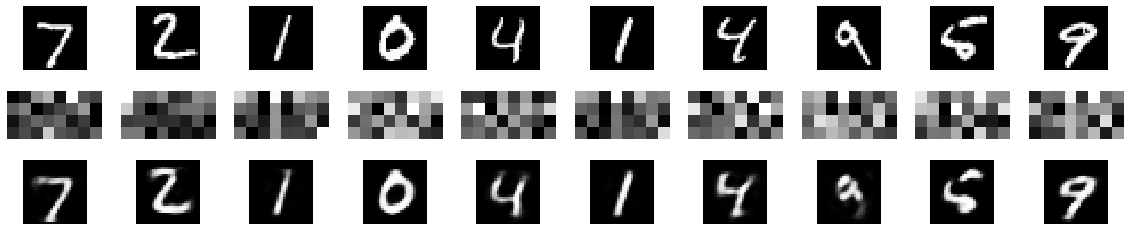

In [7]:

import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoder_imgs[i].reshape(4, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(autoencoder_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## III. Autoencoder avec Regularizers :

### 1. Construction du modèle 

In [8]:
from keras import regularizers

encoderRegula = km.Sequential()
encoderRegula.add(kl.Dense(32, activation='relu',activity_regularizer=regularizers.l2(0), input_shape=(784,)))


decoderRegula = km.Sequential()
decoderRegula.add(kl.Dense(784, activation='sigmoid'))

autoencoderRegula = km.Sequential()
autoencoderRegula.add(encoder)
autoencoderRegula.add(decoder)

### 2. Phase d'apprentissage

In [9]:
autoencoderRegula.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
autoencoderRegula.fit(x_train, x_train,
                    batch_size=256,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1050 - acc: 0.8133 - val_loss: 0.1032 - val_acc: 0.8124
Epoch 2/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.1047 - acc: 0.8134 - val_loss: 0.1029 - val_acc: 0.8125
Epoch 3/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.1043 - acc: 0.8134 - val_loss: 0.1026 - val_acc: 0.8125
Epoch 4/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.1040 - acc: 0.8134 - val_loss: 0.1023 - val_acc: 0.8125
Epoch 5/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1038 - acc: 0.8134 - val_loss: 0.1021 - val_acc: 0.8125
Epoch 6/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.1035 - acc: 0.8135 - val_loss: 0.1018 - val_acc: 0.8126
Epoch 7/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.1032 - acc: 0.8135 - val_loss: 0.1016 - val_acc

In [10]:
autoencoderRegula_imgs = autoencoderRegula.predict(x_test)
encoderRegula_imgs = encoderRegula.predict(x_test)

### 3. Affichage résultat final : 

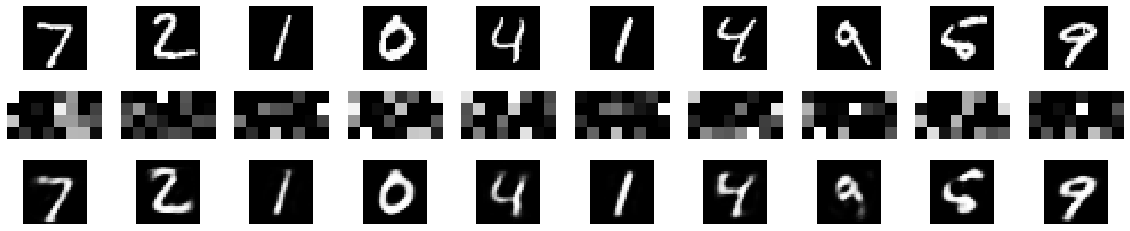

In [11]:

import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoderRegula_imgs[i].reshape(4, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(autoencoderRegula_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 4. Affichage et comparaison résultat intermédiaire :

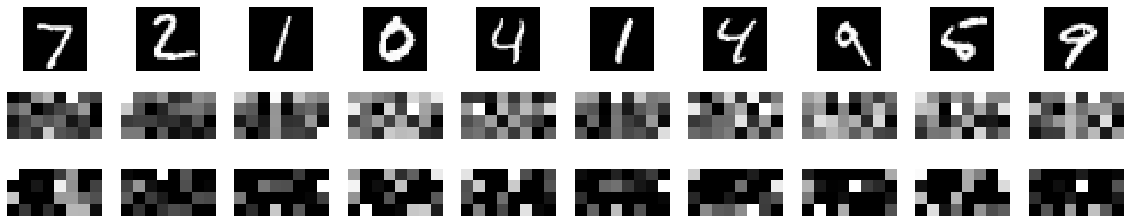

In [12]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoder_imgs[i].reshape(4, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(encoderRegula_imgs[i].reshape(4, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

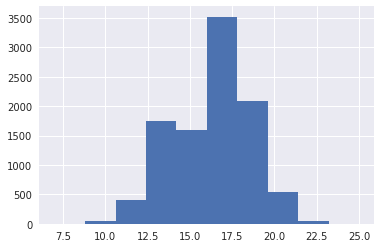

(array([6.000e+00, 3.905e+03, 4.376e+03, 0.000e+00, 1.384e+03, 2.820e+02,
        0.000e+00, 4.000e+01, 5.000e+00, 2.000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

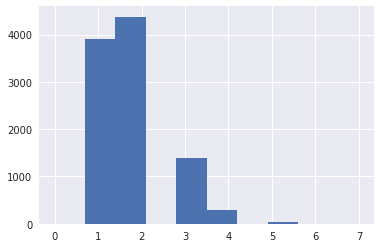

In [13]:
plt.hist(np.sum(encoderRegula_imgs==0,axis=1))
plt.show()
plt.hist(np.sum(encoder_imgs==0,axis=1))

## IV. Autoencoder avec réseaux de convolution 

### 1. Chargement et traitement de données 

In [14]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

### 2. Construction des données 

In [17]:
from keras import regularizers
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D

encoder = km.Sequential()
encoder.add(Conv2D(16, kernel_size=(3, 3), input_shape=(28,28,1) ,activation='relu', padding='same'))
encoder.add(MaxPooling2D((2, 2), padding='same'))
encoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
encoder.add(MaxPooling2D((2, 2), padding='same'))
encoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
encoder.add(MaxPooling2D((2, 2), padding='same'))

decoder = km.Sequential()
decoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
decoder.add(UpSampling2D((2, 2)))
decoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
decoder.add(UpSampling2D((2, 2)))
decoder.add(Conv2D(16, (3, 3), activation='relu'))
decoder.add(UpSampling2D((2, 2)))
decoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))


autoencoder = km.Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

### 3. Phase d'apprentissage

In [18]:
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
autoencoder.fit(x_train, x_train,
                    batch_size=128,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.2053 - acc: 0.7929 - val_loss: 0.1599 - val_acc: 0.8012
Epoch 2/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.1529 - acc: 0.7999 - val_loss: 0.1386 - val_acc: 0.8009
Epoch 3/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.1398 - acc: 0.8031 - val_loss: 0.1329 - val_acc: 0.8008
Epoch 4/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.1322 - acc: 0.8051 - val_loss: 0.1311 - val_acc: 0.8084
Epoch 5/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.1265 - acc: 0.8066 - val_loss: 0.1250 - val_acc: 0.8096
Epoch 6/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.1232 - acc: 0.8075 - val_loss: 0.1249 - val_acc: 0.8024
Epoch 7/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.1206 - acc: 0.8082 - val_loss: 0.1168 - val_acc

In [19]:
autoencoderConv_imgs = autoencoder.predict(x_test)
encoderConv_imgs = encoder.predict(x_test)

In [ ]:
print(np.shape(encoderConv_imgs))

### 4. Affichage résultat final 

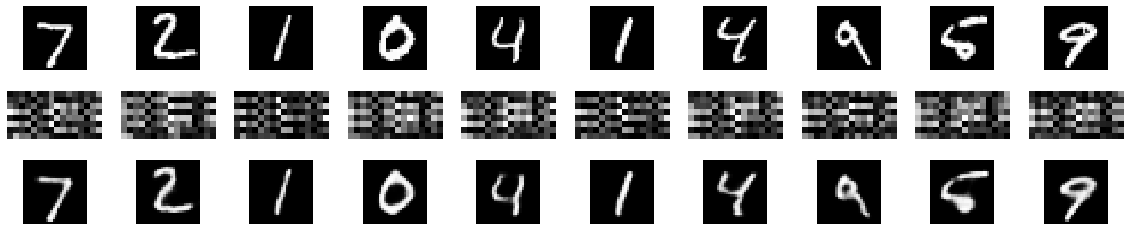

In [20]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoderConv_imgs[i].reshape(8, 16))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(autoencoderConv_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 5. Affichage résultat intermédiaire 

In [ ]:
#### 
### AFFICHAGE RÉSULTATS INTERMÉDIAIRES SORTIES ENCODER###